<a href="https://colab.research.google.com/github/Rafa777Ferreira/Api_Fecap/blob/main/Entrega02_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regressão Linear Simples via Mínimos Quadrados


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar os dados
url = "https://media.githubusercontent.com/media/2025-1-NCC5/Projeto3/refs/heads/main/documentos/Entrega%201/Inteligencia%20Artificial%20e%20Aprendizado%20de%20Maquina/Ride.csv"
df = pd.read_csv(url)
print(df.head())


   Unnamed: 0  ID_Corrida                       Criado  Preco  ID_Categoria
0           0     1685755  2025-02-10 14:31:10.9084221   0.00           NaN
1           1     1685754  2025-02-10 14:26:35.4169873  30.45           NaN
2           2     1685753  2025-02-10 14:24:32.7058722  11.40           NaN
3           3     1685752  2025-02-10 14:23:12.9975475  45.79           5.0
4           4     1685751  2025-02-10 14:19:30.6117184  17.28           NaN


In [10]:
# 2. Converter a coluna 'Criado' para datetime
df['Criado'] = pd.to_datetime(df['Criado'])

# 3. Calcular a diferença em dias desde a primeira corrida
df['DiasDesdePrimeiraCorrida'] = (df['Criado'] - df['Criado'].min()).dt.total_seconds() / (3600 * 24)

In [11]:
# 4. Definir as variáveis para regressão
x = df['DiasDesdePrimeiraCorrida'].values  # Variável independente (tempo)
y = df['Preco'].values                      # Variável dependente (preço)

# 5. Preparar matrizes para mínimos quadrados
X = np.column_stack((np.ones(len(x)), x))  # Adiciona coluna de 1s para o intercepto
Y = y.reshape(-1, 1)

In [12]:
# 6. Calcular os coeficientes usando o método dos mínimos quadrados
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
intercepto, coeficiente = beta.flatten()

# 7. Função de predição
def prever(valor):
    return intercepto + coeficiente * valor

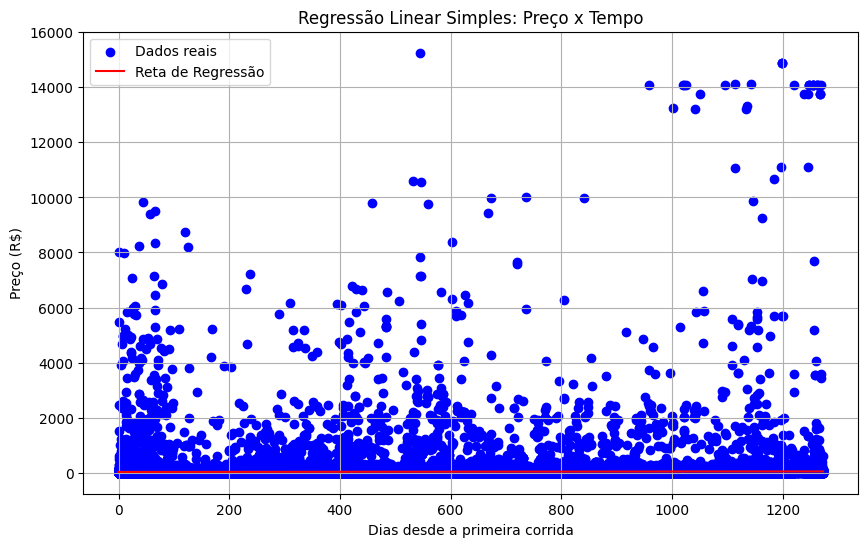

In [13]:
# 8. Gráfico de dispersão com a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Dados reais')
plt.plot(x, X @ beta, color='red', label='Reta de Regressão')
plt.xlabel("Dias desde a primeira corrida")
plt.ylabel("Preço (R$)")
plt.title("Regressão Linear Simples: Preço x Tempo")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# 9. Previsão com entrada do usuário
entrada = float(input("Digite um valor (em dias desde a primeira corrida) para prever o preço: "))
print(f"Previsão de preço para {entrada:.2f} dias: R$ {prever(entrada):.2f}")

Digite um valor (em dias desde a primeira corrida) para prever o preço: 20
Previsão de preço para 20.00 dias: R$ 28.15
